# EREBUS-11  - BME Suborbitals Rocket Team 

Launched at EUROC'22 with the target apogee of 3000 meters AGL. The rocket, unfortunately, had a ballistic trajectory
Permission to use flight data given by Tomi via discord, 2024.

These results were extracted out of the flight card:

1. Team number: `7`
2. Launch window: `October 15th, 2022, 15h-16h`
3. Last simulated apogee before flight: `2888.293 m` 
4. Official recorded apogee: `3020 m`

The relative error of altitude apogee is only `4.36%` #FIXME

Note that the simulated apogee below differs from the value obtained before the flight because of upgrades made to the rocketpy software and also because the wind profile represented below differs from the one registered at the launch site. 

In [10]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
from rocketpy import Function, Environment, Flight, Rocket, SolidMotor
from rocketpy.motors import CylindricalTank, SolidMotor
from rocketpy.motors.tank import MassFlowRateBasedTank

import matplotlib.pyplot as plt

plt.style.use("seaborn-v0_8-colorblind")

## Environment registered by windy

In [2]:
env = Environment(
    gravity=9.80665,
    date=(2022, 10, 15, 14),
    latitude=39.3897,
    longitude=-8.2889639,
    elevation=160,
    datum="WGS84",
    timezone="Portugal",
)

env.set_atmospheric_model(
    type="Reanalysis",
    file="../../data/weather/euroc_2023_all_windows.nc",
    dictionary="ECMWF",
)
env.max_expected_height = 4000
env.info()

ValueError: The chosen launch time '2022-10-15-13: UTC' is not available in the provided file. Please choose a time within the range of the file, which starts at '2023-10-12-08 UTC'.

## Motor

The rocket was equiped with a Cesaroni Motor Pro54, class K, with 2937 Ns of total impulse.

In [ ]:
ProL995 = SolidMotor(
    dry_mass=0,
    thrust_source="../../data/bmesub/thrust_source.csv",
    burn_time=3.7567,
    grain_number=3,
    grain_density=1196.9406830320868,
    grain_initial_inner_radius=0.0135,
    grain_outer_radius=0.027,
    grain_initial_height=0.572,
    nozzle_radius=0.02025,
    throat_radius=0.0135,
    grain_separation=0,
    grains_center_of_mass_position=0,
    dry_inertia=(0, 0, 0),
    center_of_dry_mass_position=0,
    coordinate_system_orientation="nozzle_to_combustion_chamber"
)

ValueError: Dry mass must be specified.

In [8]:
ProL995.info()

NameError: name 'ProL995' is not defined

## Rocket and Aerodynamic surfaces

For comparison purposes, no parachute will be added to the simulation

In [19]:
EREBUS11 = Rocket(
    radius=0.0465,
    mass=5.823,
    inertia=(0.086, 0.086, 2.571),
    center_of_mass_without_motor=1.192,
    power_off_drag="../../data/bmesub/drag_curve.csv",
    power_on_drag="../../data/bmesub/drag_curve.csv",
    coordinate_system_orientation="nose_to_tail",
)

EREBUS11.set_rail_buttons(2.624813, 3.134042)

EREBUS11.add_motor(ProL995, position=1.8823775510204097)

NameError: name 'ProL995' is not defined

In [20]:
NoseCone = EREBUS11.add_nose(
    length=0.391113,
    kind="vonKarman",
    base_radius=0.0465,
    position= 0.0
)

FinSet = EREBUS11.add_trapezoidal_fins(
    n=4,
    span=0.08,
    root_chord=0.12,
    tip_chord=0.05,
    position=2.131513,
)

Tail = EREBUS11.add_tail(
    bottom_radius=0.035750000000000004,
    length= 0.079119,
    position=2.093313,
    top_radius= 0.0465
)

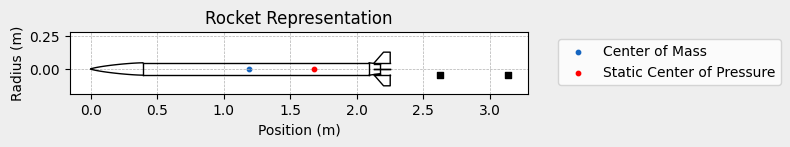

In [21]:
EREBUS11.draw()

# Flight Simulation DATA

In [17]:
test_flight = Flight(
    rocket=EREBUS11, environment=env, inclination=84, heading=133, rail_length=12
)

NameError: name 'env' is not defined

In [18]:
test_flight.prints.apogee_conditions()
test_flight.plots.trajectory_3d()

NameError: name 'test_flight' is not defined

# Data analysis

In [20]:
from rocketpy.simulation.flight_data_importer import FlightDataImporter


columns_map = {
    "ts": "time",
    "altitude[m]": "altitude",
    "velocity[m/s]": "vz",
}

cots_altimeter_flight = FlightDataImporter(
    name="COTS Altimeter Flight",
    paths="../../data/polito/altimeter_cavour.csv",
    columns_map=columns_map,
    units=None,
    interpolation="linear",
    extrapolation="zero",
    delimiter=",",
    encoding="utf-8",
)

The following attributes were create and are now available to be used:  ['time', 'altitude', 'vz']


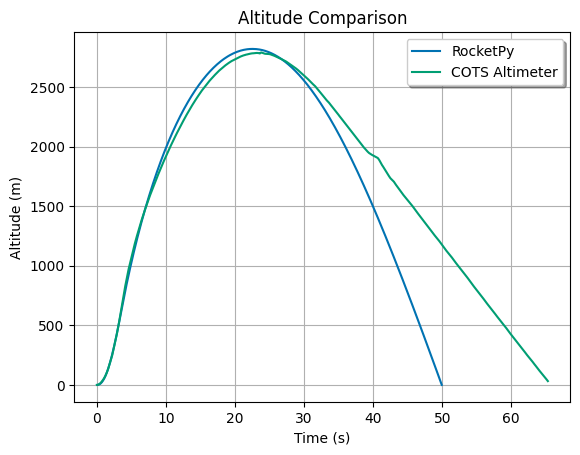

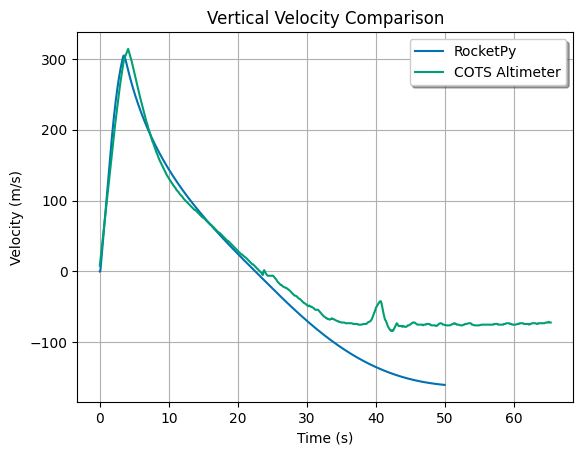

In [22]:
Function.compare_plots(
    [
        (test_flight.altitude, "RocketPy"),
        (cots_altimeter_flight.altitude, "COTS Altimeter"),
    ],
    title="Altitude Comparison",
    xlabel="Time (s)",
    ylabel="Altitude (m)",
)

Function.compare_plots(
    [
        (test_flight.vz, "RocketPy"),
        (cots_altimeter_flight.vz, "COTS Altimeter"),
    ],
    title="Vertical Velocity Comparison",
    xlabel="Time (s)",
    ylabel="Velocity (m/s)",
)